## 1. 一元线性回归数据准备

In [80]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
df = pd.read_csv('../assets/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [82]:
X = df.drop("medv", axis=1)  # 特征
y = df["medv"]               # 目标变量（房价中位数）
X[:5],y[:5]

(      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
 
         b  lstat  
 0  396.90   4.98  
 1  396.90   9.14  
 2  392.83   4.03  
 3  394.63   2.94  
 4  396.90   5.33  ,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: medv, dtype: float64)

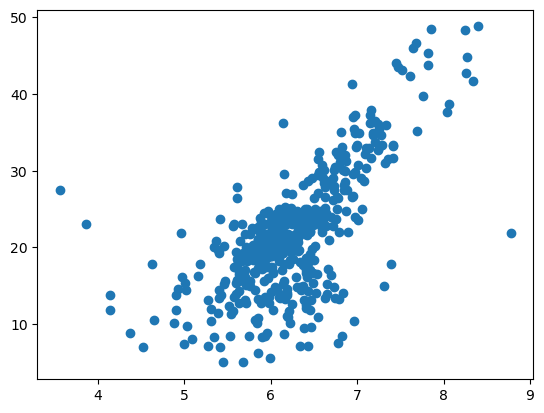

In [83]:
x = X['rm'].values  # extract the 'rm' column and convert to numpy array
# y = y.values  # convert the target variable to numpy array
x = x[y<50]
y = y[y<50]

plt.scatter(x,y)
plt.show()

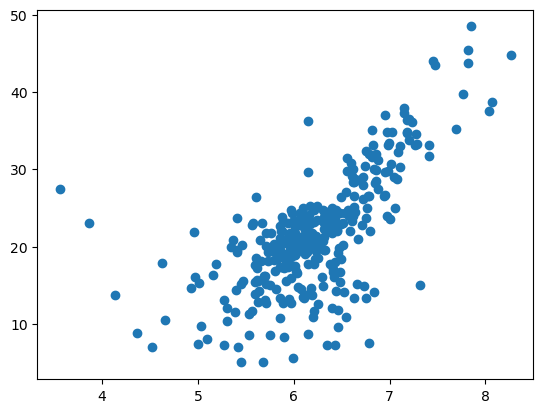

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

plt.scatter(x_train, y_train)
plt.show()

## 2. 一元线性回归公式实现

In [85]:
def fit(x, y):
    a_up = np.sum((x-np.mean(x))*(y - np.mean(y)))
    a_bottom = np.sum((x-np.mean(x))**2)
    a = a_up / a_bottom
    b = np.mean(y) - a * np.mean(x)
    return a, b

In [86]:
# 直线方程 y=ax+b
a, b = fit(x_train, y_train)
a, b

(np.float64(8.056822140369603), np.float64(-28.49306872447786))

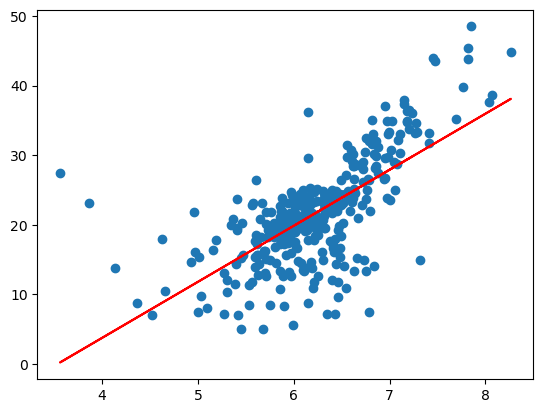

In [87]:
plt.scatter(x_train, y_train)
plt.plot(x_train, a*x_train+ b, c='r')
plt.show()

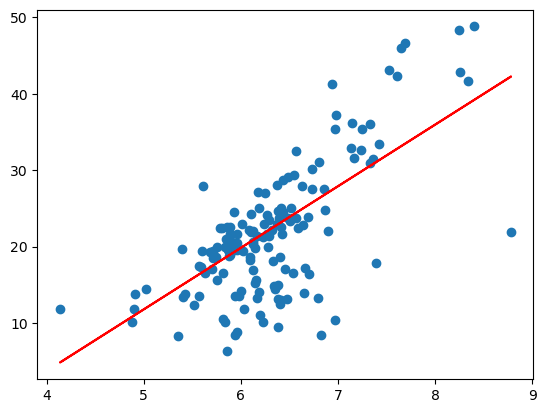

In [88]:
plt.scatter(x_test, y_test)
plt.plot(x_test, a*x_test+ b, c='r')
plt.show()

## 3. sklearn实现一元线性回归

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [90]:
y_predict = lin_reg.predict(x_test.reshape(-1,1))

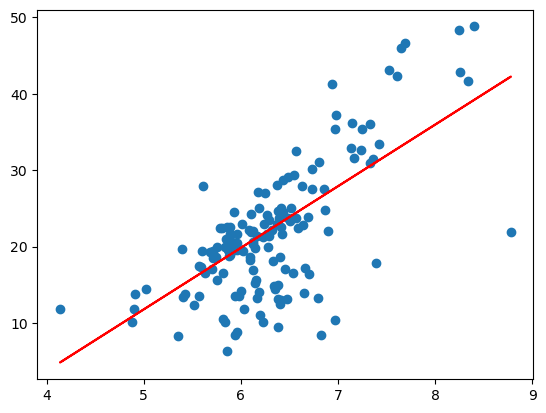

In [91]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, c='r')
plt.show()

## 4. sklearn 实现多元线性回归

In [109]:
# 清理掉异常值
boston_filtered = df[df['medv'] < 50]

# Separate features and target
X_filtered = boston_filtered.drop('medv', axis=1)
y_filtered = boston_filtered['medv']

# Split the filtered data
x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=0)

In [110]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [111]:
lin_reg.score(x_test, y_test)

0.7455942658788957

### 归一化？
- 可以看到结果是没有影响的,所以多元线性回归是不需要归一化的
- 因为多元线性回归学习的是每一维的特征,不需要归一化

In [112]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

In [113]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [114]:
lin_reg.score(x_test, y_test)

0.7455942658788963